TASK:

Create NN with Keras to classify goods from dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Proposed NN initial architecture: - 
- # layers (in, den1, den2, out)
- activation func (Hidden: ReLU, Leaky ReLU, Parametric ReLU, ELU; Output: Softmax)
- # epoch (50 - 600)
- # neurons in layer (784, 128, 256, 10)
- batch size (32, 72)
- optimizer (SGD,  Adam)
- initial learning rate (0.025)
- validation rate in training data (40%)
Requirement of accuracy: >=0.91

# MODEL sgd_b32_ep50

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("sgd_b32_ep50")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b32_ep50

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adam_2_b32_ep50")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b32_ep50

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adamax_b32_ep50")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b32_ep50_reg

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adam_b32_ep50_reg")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class+1}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b128_ep200_reg

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 200 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adam_b128_ep200_reg")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class+1}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL sgd_b128_ep50

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("sgd_b128_ep50")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

In [ ]:
# MODEL Adam_b32_ep100_drop

from tensorflow import keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 100 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)
print(results)



In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

model.save("Adam_b32_ep100_drop")



In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")


plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b128_ep50_drop

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adamax_b128_ep50_drop")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b128_ep50_drop_reg

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adamax_b128_ep50_drop_reg")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b32_ep50_drop_3layers

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя
n_hidden_3 = 512 # количество нейронов 3-го слоя

In [ ]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.3),
    Dense(n_hidden_3, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adamax_b32_ep50_drop_3layers")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL sgd_b13_l28_28_56_ep1000

In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 1000 # number of epoch
batch_size = 13 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 28 # количество нейронов 1-го слоя
n_hidden_2 = 28 # количество нейронов 2-го слоя
n_hidden_3 = 56 # количество нейронов 2-го слоя

In [5]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dense(n_hidden_2, activation='relu'),
    Dense(n_hidden_3, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

In [8]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.8216 - accuracy: 0.7046 - val_loss: 0.5941 - val_accuracy: 0.7908
Epoch 2/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.5086 - accuracy: 0.8208 - val_loss: 0.4594 - val_accuracy: 0.8378
Epoch 3/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.4535 - accuracy: 0.8382 - val_loss: 0.4618 - val_accuracy: 0.8310
Epoch 4/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.4216 - accuracy: 0.8477 - val_loss: 0.4214 - val_accuracy: 0.8460
Epoch 5/1000
3077/3077 [==============================] - 10s 3ms/step - loss: 0.4008 - accuracy: 0.8564 - val_loss: 0.4068 - val_accuracy: 0.8540
Epoch 6/1000
3077/3077 [==============================] - 9s 3ms/step - loss: 0.3829 - accuracy: 0.8613 - val_loss: 0.4182 - val_accuracy: 0.8461
Epoch 7/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.3690 - accuracy: 0.8651 - val_loss: 0.3843 

Epoch 57/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.2050 - accuracy: 0.9234 - val_loss: 0.3723 - val_accuracy: 0.8763
Epoch 58/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.2025 - accuracy: 0.9243 - val_loss: 0.3811 - val_accuracy: 0.8766
Epoch 59/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.2025 - accuracy: 0.9227 - val_loss: 0.3758 - val_accuracy: 0.8803
Epoch 60/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.2013 - accuracy: 0.9250 - val_loss: 0.3797 - val_accuracy: 0.8763
Epoch 61/1000
3077/3077 [==============================] - 8s 2ms/step - loss: 0.2007 - accuracy: 0.9244 - val_loss: 0.3857 - val_accuracy: 0.8755
Epoch 62/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.1989 - accuracy: 0.9254 - val_loss: 0.3827 - val_accuracy: 0.8747
Epoch 63/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1981 - accuracy: 0.9252 - val_loss: 0

3077/3077 [==============================] - 7s 2ms/step - loss: 0.1501 - accuracy: 0.9439 - val_loss: 0.4808 - val_accuracy: 0.8760
Epoch 113/1000
3077/3077 [==============================] - 8s 2ms/step - loss: 0.1482 - accuracy: 0.9443 - val_loss: 0.5156 - val_accuracy: 0.8685
Epoch 114/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.1471 - accuracy: 0.9454 - val_loss: 0.4810 - val_accuracy: 0.8769
Epoch 115/1000
3077/3077 [==============================] - 8s 2ms/step - loss: 0.1469 - accuracy: 0.9455 - val_loss: 0.4796 - val_accuracy: 0.8753
Epoch 116/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1482 - accuracy: 0.9448 - val_loss: 0.4995 - val_accuracy: 0.8766
Epoch 117/1000
3077/3077 [==============================] - 8s 2ms/step - loss: 0.1460 - accuracy: 0.9453 - val_loss: 0.4973 - val_accuracy: 0.8697
Epoch 118/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.1446 - accuracy: 0.9460 - val_loss: 0.4927 - 

3077/3077 [==============================] - 8s 3ms/step - loss: 0.1176 - accuracy: 0.9566 - val_loss: 0.6092 - val_accuracy: 0.8698
Epoch 168/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1205 - accuracy: 0.9558 - val_loss: 0.6153 - val_accuracy: 0.8714
Epoch 169/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.1155 - accuracy: 0.9570 - val_loss: 0.6040 - val_accuracy: 0.8712
Epoch 170/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1176 - accuracy: 0.9567 - val_loss: 0.6373 - val_accuracy: 0.8688
Epoch 171/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1202 - accuracy: 0.9550 - val_loss: 0.6506 - val_accuracy: 0.8617
Epoch 172/1000
3077/3077 [==============================] - 7s 2ms/step - loss: 0.1157 - accuracy: 0.9571 - val_loss: 0.6056 - val_accuracy: 0.8735
Epoch 173/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.1119 - accuracy: 0.9583 - val_loss: 0.6088 - 

3077/3077 [==============================] - 8s 3ms/step - loss: 0.0933 - accuracy: 0.9646 - val_loss: 0.7298 - val_accuracy: 0.8725
Epoch 223/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.0980 - accuracy: 0.9641 - val_loss: 0.7756 - val_accuracy: 0.8651
Epoch 224/1000
3077/3077 [==============================] - 8s 3ms/step - loss: 0.0907 - accuracy: 0.9675 - val_loss: 0.7364 - val_accuracy: 0.8712
Epoch 225/1000
2121/3077 [===================>..........] - ETA: 1s - loss: 0.0878 - accuracy: 0.9681

KeyboardInterrupt: 

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.8232 - accuracy: 0.8629
[0.8231821060180664, 0.8629000186920166]


In [12]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

NameError: name 'history' is not defined

In [ ]:
model.save("sgd_b32_l32_32_64_ep1000")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL adam_l128_64_ep10

In [32]:
from tensorflow import keras

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [35]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 10 # number of epoch
#batch_size = 13 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 64 # количество нейронов 2-го слоя


In [36]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [38]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),  
    Dense(n_hidden_2, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

In [39]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [41]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    #batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5744 - accuracy: 0.7951 - val_loss: 0.4978 - val_accuracy: 0.8030
Epoch 2/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.4251 - accuracy: 0.8465 - val_loss: 0.3825 - val_accuracy: 0.8576
Epoch 3/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3840 - accuracy: 0.8601 - val_loss: 0.3644 - val_accuracy: 0.8640
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3608 - accuracy: 0.8700 - val_loss: 0.3541 - val_accuracy: 0.8694
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3465 - accuracy: 0.8728 - val_loss: 0.3675 - val_accuracy: 0.8656
Epoch 6/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3330 - accuracy: 0.8766 - val_loss: 0.3874 - val_accuracy: 0.8603
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3210 - accuracy: 0.8807 - val_loss: 0.3349 - val_accuracy:

In [42]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8753
[0.34580856561660767, 0.8752999901771545]


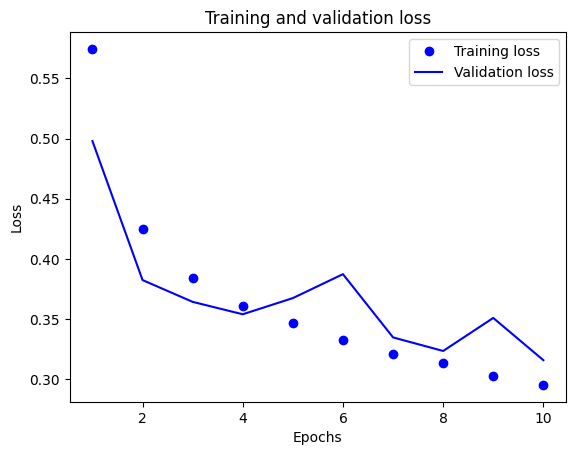

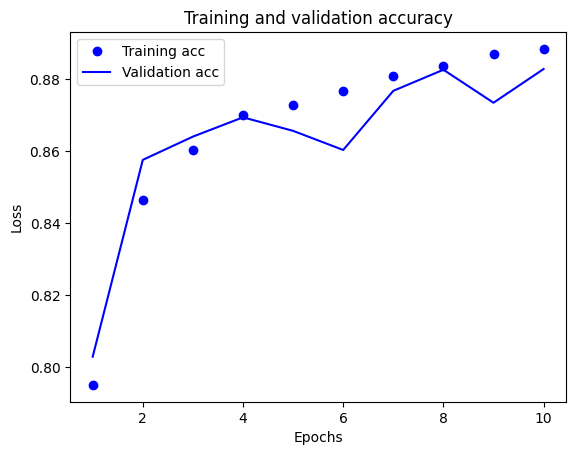

In [43]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [44]:
model.save("adam_l128_64_ep10")

INFO:tensorflow:Assets written to: adam_l128_64_ep10\assets


INFO:tensorflow:Assets written to: adam_l128_64_ep10\assets


In [45]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 116ms/step
Predicted class: 1


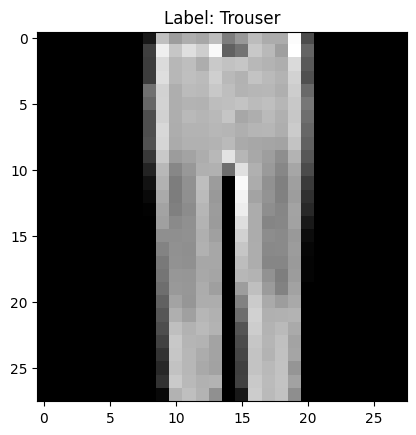

In [46]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL adam_l128_64_ep200_flat

In [169]:
from tensorflow import keras

In [170]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [171]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [172]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 200 # number of epoch
#batch_size = 13 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 64 # количество нейронов 2-го слоя


In [173]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
#x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [174]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [175]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(n_hidden_1, activation='relu'),
    Dropout(0.6),  
    Dense(n_hidden_2, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

In [176]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [177]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [178]:
history = model.fit(
    x_train,
    y_train,
    epochs=training_steps,
    #batch_size=batch_size,
    validation_data=(x_test, y_test)
)

Epoch 1/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6911 - accuracy: 0.7463 - val_loss: 0.4838 - val_accuracy: 0.8201
Epoch 2/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5314 - accuracy: 0.8055 - val_loss: 0.4385 - val_accuracy: 0.8402
Epoch 3/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4913 - accuracy: 0.8198 - val_loss: 0.4165 - val_accuracy: 0.8478
Epoch 4/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4660 - accuracy: 0.8290 - val_loss: 0.4064 - val_accuracy: 0.8544
Epoch 5/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4502 - accuracy: 0.8349 - val_loss: 0.3954 - val_accuracy: 0.8573
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4420 - accuracy: 0.8364 - val_loss: 0.4112 - val_accuracy: 0.8473
Epoch 7/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4261 - accuracy: 0.8417 - val_loss: 0.3949 - val_ac

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3232 - accuracy: 0.8809 - val_loss: 0.3622 - val_accuracy: 0.8705
Epoch 58/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3224 - accuracy: 0.8800 - val_loss: 0.3523 - val_accuracy: 0.8726
Epoch 59/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3218 - accuracy: 0.8795 - val_loss: 0.3705 - val_accuracy: 0.8610
Epoch 60/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3205 - accuracy: 0.8804 - val_loss: 0.3485 - val_accuracy: 0.8741
Epoch 61/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3180 - accuracy: 0.8807 - val_loss: 0.3578 - val_accuracy: 0.8747
Epoch 62/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3189 - accuracy: 0.8819 - val_loss: 0.3550 - val_accuracy: 0.8719
Epoch 63/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3183 - accuracy: 0.8822 - val_loss: 0.3485 - val_accuracy

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.8911 - val_loss: 0.3665 - val_accuracy: 0.8687
Epoch 114/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2909 - accuracy: 0.8919 - val_loss: 0.3678 - val_accuracy: 0.8666
Epoch 115/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2974 - accuracy: 0.8891 - val_loss: 0.3643 - val_accuracy: 0.8665
Epoch 116/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2943 - accuracy: 0.8898 - val_loss: 0.3492 - val_accuracy: 0.8794
Epoch 117/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2960 - accuracy: 0.8897 - val_loss: 0.3581 - val_accuracy: 0.8768
Epoch 118/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2934 - accuracy: 0.8913 - val_loss: 0.3745 - val_accuracy: 0.8670
Epoch 119/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2933 - accuracy: 0.8907 - val_loss: 0.3641 - val_ac

Epoch 169/200
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2817 - accuracy: 0.8950 - val_loss: 0.3487 - val_accuracy: 0.8783
Epoch 170/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2792 - accuracy: 0.8958 - val_loss: 0.3486 - val_accuracy: 0.8814
Epoch 171/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2809 - accuracy: 0.8949 - val_loss: 0.3649 - val_accuracy: 0.8773
Epoch 172/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.8952 - val_loss: 0.3699 - val_accuracy: 0.8712
Epoch 173/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2770 - accuracy: 0.8965 - val_loss: 0.3665 - val_accuracy: 0.8750
Epoch 174/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8959 - val_loss: 0.3631 - val_accuracy: 0.8741
Epoch 175/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.8951 - val_loss: 

In [179]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.8796
[0.3570803701877594, 0.8795999884605408]


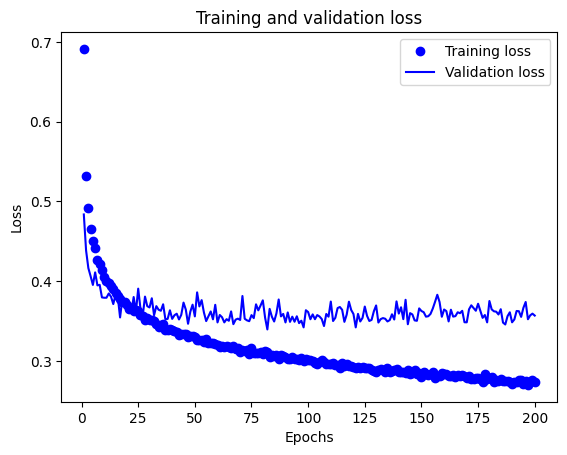

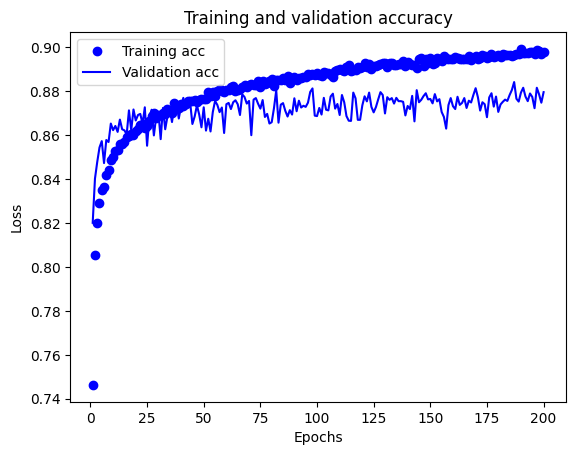

In [180]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [181]:
model.save("adam_l128_64_ep200_flat")

INFO:tensorflow:Assets written to: adam_l128_64_ep200_flat\assets


INFO:tensorflow:Assets written to: adam_l128_64_ep200_flat\assets


In [182]:
print(x_test[random_index, :])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.24313726 0.7529412
  0.5568628  0.654902   0.57254905 0.627451   0.7019608  0.
  0.         0.         0.         0.01176471 0.         0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.08235294 0.38039216 0.654902   0.7294118  0.78039217
  0.10588235 0.01960784 0.07450981 0.10588235 0.7137255  0.8039216
  0.5058824  0.18039216 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.5254902  0.6901961  0.6862745  0.65882355 0.61960787 0.70980394
  0.57254905 0.20784314 0.07058824 0.43529412 0.7019608  0.5647059
  0.6509804  0.654902   0.5764706  0.20392157 0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.01568628 0.         0.19215687
  0.7294118  0.568

In [183]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 28, 28))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 100ms/step
Predicted class: 8


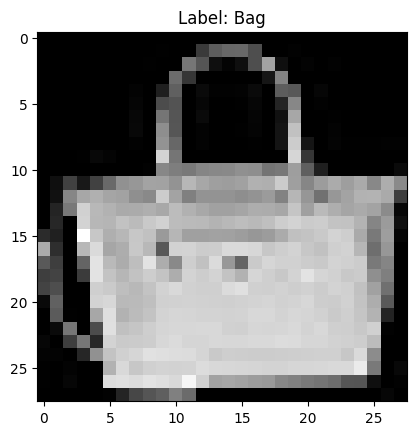

In [184]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# SUMMARY:


In [203]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
#y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


saved_model_list = ['Adam_2_b32_ep50', 'Adam_b128_ep200_reg', 'Adam_b128_ep50_reg', 'Adam_b32_ep100_drop', 'Adam_b32_ep50',\
                   'Adam_b32_ep50_drop', 'Adam_b32_ep50_reg', 'adam_l128_64_ep10', 'Adamax_b128_ep50_drop',\
                   'Adamax_b128_ep50_drop_3layers', 'Adamax_b128_ep50_drop_reg', 'Adamax_b32_ep50', \
                    'Adamax_b32_ep50_drop_3layers', 'Adamax_b32_ep50_drop_3layers', 'sgd_b128_ep50', 'sgd_b32_ep50'  ]
accuracy_results = []
for item in saved_model_list:
    model = keras.models.load_model(item)
    result = model.evaluate(x_test, y_test)
    accuracy_results.append(result[1])
print(accuracy_results)
    


313/313 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8741
[0.8863999843597412, 0.8436999917030334, 0.8465999960899353, 0.8640000224113464, 0.8813999891281128, 0.8701000213623047, 0.8435999751091003, 0.8752999901771545, 0.8784000277519226, 0.8560000061988831, 0.8495000004768372, 0.8853999972343445, 0.8712000250816345, 0.8712000250816345, 0.8621000051498413, 0.8741000294685364]


C:\Users\Serhii\AppData\Local\Temp\ipykernel_1244\50003022.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


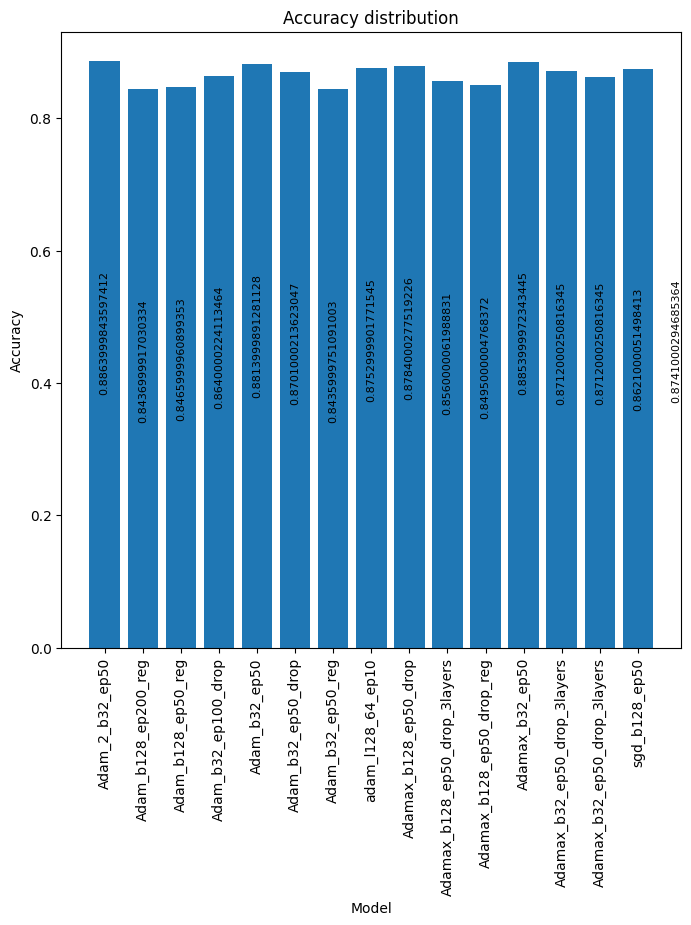

In [214]:
# Create the bar plot Accuracy distribution
# Data for the plot
fig, ax = plt.subplots(figsize=(8, 8))

x = saved_model_list
y = accuracy_results

ax.bar(x, y)

# Add the value of each bar to the plot
for i, v in enumerate(y):
    ax.text(i, v-0.5, str(v), ha='center', rotation=90, fontsize=8)

# Add a title and axis labels
ax.set_title("Accuracy distribution")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_xticklabels(x, rotation=90)

# Show the plot
plt.show() 

### RESULT: The best option is Adam_2_b32_ep50 wit accuracy: 0.8863999843597412 